# Week 4 Individual Coding Assignment #8

## Prepping 2015 census collision data. 

In [1]:
#Importing geopanda libraries 

import pandas as pd
import geopandas as gpd

In [4]:
#Importing data

pedes = gpd.read_file('Colision_2015.csv')

In [5]:
# Checking it's the correct data I need to work with

type (pedes)

geopandas.geodataframe.GeoDataFrame

In [6]:
# top 5 
pedes.head ()

,Primary,Secondary,Address,LAT,LON,geometry
0,RT 138,10TH ST EAST,RT 138 and 10TH ST EAST,34.5795074,-118.1118505,None
1,RT 1,RAMIREZ MESA RD,RT 1 and RAMIREZ MESA RD,34.0220686,-118.7914193,None
2,DEL AMO BL,AVALON BL,DEL AMO BL and AVALON BL,33.8474791,-118.2646451,None
3,RT 19,MAYNE ST,RT 19 and MAYNE ST,33.88571175,-118.1360849,None
4,ORCHARD VILLAGE RD,VIA GAVOLA,ORCHARD VILLAGE RD and VIA GAVOLA,34.3944009,-118.5516033,None


In [7]:
pedes.dtypes

Primary        object
Secondary      object
Address        object
LAT            object
LON            object
geometry     geometry
dtype: object

In [8]:
# dataframe info. Latitude and longitude are objects so will have to convert to string later to be able to map. 
pedes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Primary    563 non-null    object  
 1   Secondary  563 non-null    object  
 2   Address    563 non-null    object  
 3   LAT        563 non-null    object  
 4   LON        563 non-null    object  
 5   geometry   0 non-null      geometry
dtypes: geometry(1), object(5)
memory usage: 26.5+ KB


### What data are we working with?

In [9]:
# how many rows and columns?
pedes.shape

(563, 6)

In [10]:
# top 5 
pedes.head ()

,Primary,Secondary,Address,LAT,LON,geometry
0,RT 138,10TH ST EAST,RT 138 and 10TH ST EAST,34.5795074,-118.1118505,None
1,RT 1,RAMIREZ MESA RD,RT 1 and RAMIREZ MESA RD,34.0220686,-118.7914193,None
2,DEL AMO BL,AVALON BL,DEL AMO BL and AVALON BL,33.8474791,-118.2646451,None
3,RT 19,MAYNE ST,RT 19 and MAYNE ST,33.88571175,-118.1360849,None
4,ORCHARD VILLAGE RD,VIA GAVOLA,ORCHARD VILLAGE RD and VIA GAVOLA,34.3944009,-118.5516033,None


In [11]:
# what are the columns?
pedes.columns.to_list()

['Primary', 'Secondary', 'Address', 'LAT', 'LON', 'geometry']

In [12]:
pedes['LAT'].value_counts()

33.8656254    3
34.6901946    3
34.6894733    3
33.8250985    3
34.4132761    3
             ..
33.936031     1
33.8459628    1
33.8659087    1
33.8994746    1
33.8784906    1
Name: LAT, Length: 492, dtype: int64

### Prep Data

In [13]:
# output the original data's info
pedes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Primary    563 non-null    object  
 1   Secondary  563 non-null    object  
 2   Address    563 non-null    object  
 3   LAT        563 non-null    object  
 4   LON        563 non-null    object  
 5   geometry   0 non-null      geometry
dtypes: geometry(1), object(5)
memory usage: 26.5+ KB


In [14]:
df = gpd.read_file('Colision_2015.csv')

In [15]:
df['LAT'] = pd.to_numeric(df['LAT'])
df['LON'] = pd.to_numeric(df['LON'])

In [16]:
# LAT and LON are now float64
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Primary    563 non-null    object  
 1   Secondary  563 non-null    object  
 2   Address    563 non-null    object  
 3   LAT        563 non-null    float64 
 4   LON        563 non-null    float64 
 5   geometry   0 non-null      geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 26.5+ KB


### Attempt at Mapping

In [17]:
# importing more libraries

import matplotlib.pyplot as plt

import contextily as ctx

In [18]:
df['LAT'] = pd.to_numeric(df['LAT'])
df['LON'] = pd.to_numeric(df['LON'])

In [19]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.LON, df.LAT))

In [20]:
# output the data's projection
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

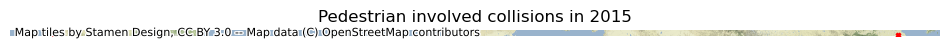

In [21]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
gdf.plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Pedestrian involved collisions in 2015')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

Tried to map 2015 data but kept getting a kernel dying notification! Unsure if my data is not formatted correctly. Will attempt again. 